In [1]:
#!usr/bin/python

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the color blinding palette; Note: for the plot only, adding white colors at the end  
# Palette from: https://github.com/JLSteenwyk/ggpubfigs 
colors_0  = ['#332288', '#117733', '#CC6677', '#88CCEE', '#999933', '#882255', '#44AA99', '#DDCC77', '#AA4499']
colors_1  = ['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255', '#FFFFFF']
colors_2  = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#000000', '#FFFFFF']
colors_3  = ['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#56B4E9', '#E69F00', '#F0E442', '#FFFFFF', '#FFFFFF']
colors_4  = ['#4477AA', '#228833', '#AA3377', '#BBBBBB', '#66CCEE', '#CCBB44', '#EE6677', '#FFFFFF', '#FFFFFF']
colors_5  = ['#0077BB', '#EE7733', '#33BBEE', '#CC3311', '#009988', '#EE3377', '#BBBBBB', '#FFFFFF', '#FFFFFF']
colors_6  = ['#648FFF', '#FE6100', '#785EF0', '#FFB000', '#DC267F', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF']
colors_7  = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF']
colors_8  = ['#601A4A', '#EE442F', '#63ACBE', '#F9F4EC', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF']
colors_9  = ['#F5793A', '#A95AA1', '#85C0F9', '#0F2080', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF']
colors_10 = ['#004488', '#BB5566', '#DDAA33', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF']

# Create a ListedColormap for each color palette
muted_nine     = ListedColormap(colors_0,  name="muted_nine")
tol_eight      = ListedColormap(colors_1,  name="tol_eight") 
wong_eight     = ListedColormap(colors_2,  name="wong_eight")
ito_seven      = ListedColormap(colors_3,  name="ito_seven")
bright_seven   = ListedColormap(colors_4,  name="bright_seven")
vibrant_seven  = ListedColormap(colors_5,  name="vibrant_seven")
nickel_five    = ListedColormap(colors_6,  name="nickel_five")
ibm_five       = ListedColormap(colors_7,  name="ibm_five")
retro_four     = ListedColormap(colors_8,  name="retro_four")
zesty_four     = ListedColormap(colors_9,  name="zesty_four")
contrast_three = ListedColormap(colors_10, name="contrast_three") 

try:
    # Registering the colormap
    mpl.colormaps.register(cmap=muted_nine)
    mpl.colormaps.register(cmap=tol_eight)
    mpl.colormaps.register(cmap=wong_eight)
    mpl.colormaps.register(cmap=ito_seven)
    mpl.colormaps.register(cmap=bright_seven)
    mpl.colormaps.register(cmap=vibrant_seven)
    mpl.colormaps.register(cmap=nickel_five)
    mpl.colormaps.register(cmap=ibm_five)
    mpl.colormaps.register(cmap=retro_four)
    mpl.colormaps.register(cmap=zesty_four)
    mpl.colormaps.register(cmap=contrast_three)
except ValueError:
    # Color already registered; do nothing  
    pass
    

def highlight_cell(x,y, ax=None, **kwargs):
    '''
    Function to create border around the cells
    From https://stackoverflow.com/questions/56654952/how-to-draw-cell-borders-in-imshow
    '''
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

def color_axis(ax, data, cmap_str):
    '''
    Function that will return an axis with the plot of each colormap
    '''
    ax.imshow(data, cmap=cmap_str)
    my_yticks = ['','',cmap_str,'','']
    ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_yticklabels(my_yticks, fontsize=20)
    ax.tick_params(left=False)
    ax.get_xaxis().set_visible(False)
    for i in range(len(data[0])):
        highlight_cell(i,0, ax=ax, color="white", linewidth=6)
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    return ax    

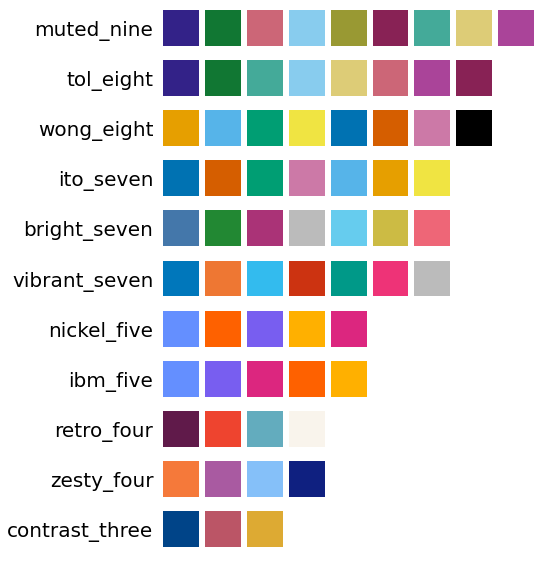

In [2]:
data = [[i+1 for i in range(len(muted_nine.colors))]]

cmaps_str = ["muted_nine", 
             "tol_eight", 
             "wong_eight", 
             "ito_seven", 
             "bright_seven",
             "vibrant_seven", 
             "nickel_five", 
             "ibm_five", 
             "retro_four", 
             "zesty_four", 
             "contrast_three"]


# Plotting 
fig, axes = plt.subplots(figsize=(14,10), nrows=11)

for i in range(len(cmaps_str)):
    color_axis(axes[i], data, cmaps_str[i])
    
plt.savefig('ColorBlinding_Palette.png', dpi=300, bbox_inches='tight')